In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

def load_data():
    # Load the diabetes prediction dataset
    data = pd.read_csv('diabetes_prediction_dataset.csv')
    return data

def preprocess_data(data):
    # Convert categorical variables to numerical
    data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})
    data['smoking_history'] = data['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5})

    return data

def data_split(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    return train_x, test_x, train_y, test_y

def data_scaling(train_x, test_x):
    ss = StandardScaler()
    ss_model = ss.fit(train_x)
    train_x_scaled = ss_model.transform(train_x)
    test_x_scaled = ss_model.transform(test_x)
    return train_x_scaled, test_x_scaled

def data_scaling_plot(data):
    X = data.iloc[:, :-1].to_numpy()
    y = data.iloc[:, -1].to_numpy()
    ss = StandardScaler()
    ss_model = ss.fit(X)
    X_scaled = ss_model.transform(X)
    np_new = np.hstack((X_scaled, y.reshape(len(y), 1)))
    column_headers = data.columns.values.tolist()
    df_new = pd.DataFrame(data=np_new, columns=column_headers)
    return df_new

def check_num(df):
    print("Class 0:", (df.iloc[:, -1] == 0).sum())
    print("Class 1:", (df.iloc[:, -1] == 1).sum())

def oversample(df):
    if (df.iloc[:, -1] == 0).sum() >= (df.iloc[:, -1] == 1).sum():
        df_majority = df[df.iloc[:, -1] == 0]
        df_minority = df[df.iloc[:, -1] == 1]
        n_major = (df.iloc[:, -1] == 0).sum()
    else:
        df_majority = df[df.iloc[:, -1] == 1]
        df_minority = df[df.iloc[:, -1] == 0]
        n_major = (df.iloc[:, -1] == 1).sum()

    df_minority_oversample = resample(df_minority,
                                      replace=True,
                                      n_samples=n_major,
                                      random_state=42)
    resample_df = pd.concat([df_minority_oversample, df_majority])
    resample_df = resample_df.sample(frac=1, random_state=0).reset_index(drop=True)
    return resample_df

def undersample(df):
    if (df.iloc[:, -1] == 0).sum() >= (df.iloc[:, -1] == 1).sum():
        df_majority = df[df.iloc[:, -1] == 0]
        df_minority = df[df.iloc[:, -1] == 1]
        n_minor = (df.iloc[:, -1] == 1).sum()
    else:
        df_majority = df[df.iloc[:, -1] == 1]
        df_minority = df[df.iloc[:, -1] == 0]
        n_minor = (df.iloc[:, -1] == 0).sum()

    df_majority_undersample = resample(df_majority,
                                       replace=True,
                                       n_samples=n_minor,
                                       random_state=42)
    resample_df = pd.concat([df_majority_undersample, df_minority])
    resample_df = resample_df.sample(frac=1, random_state=1).reset_index(drop=True)
    return resample_df

# Apply Functions

In [ ]:
# Load and preprocess the data
data = load_data()
preprocessed_data = preprocess_data(data)

# Split the data
train_x, test_x, train_y, test_y = data_split(preprocessed_data)

# Scale the features
train_x_scaled, test_x_scaled = data_scaling(train_x, test_x)

In [ ]:
print(preprocessed_data.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0     0.0  80.0             0              1                0  25.19   
1     0.0  54.0             0              0                1  27.32   
2     1.0  28.0             0              0                0  27.32   
3     0.0  36.0             0              0                2  23.45   
4     1.0  76.0             1              1                2  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
preprocessed_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
1,0.0,54.0,0,0,1,27.32,6.6,80,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,2,23.45,5.0,155,0
4,1.0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,1,27.32,6.2,90,0
99996,0.0,2.0,0,0,1,17.37,6.5,100,0
99997,1.0,66.0,0,0,3,27.83,5.7,155,0
99998,0.0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
check_num(preprocessed_data)


Class 0: 91500
Class 1: 8500


In [ ]:
scaled_df = pd.DataFrame(train_x_scaled, columns=train_x.columns)
print(scaled_df.head())

     gender       age  hypertension  heart_disease  smoking_history       bmi  \
0 -0.840981 -1.772866     -0.283591      -0.202256        -0.210125 -1.636804   
1 -0.840981  0.580603     -0.283591      -0.202256        -0.898694 -0.413135   
2 -0.840981 -0.795954     -0.283591      -0.202256        -0.210125 -0.837059   
3  1.189088 -0.529524     -0.283591      -0.202256        -0.898694 -0.002739   
4  1.189088 -1.284410     -0.283591      -0.202256        -0.210125 -1.348175   

   HbA1c_level  blood_glucose_level  
0     0.628048             0.517745  
1     0.441306            -0.195693  
2    -0.959261            -0.195693  
3     0.628048             0.517745  
4     0.908161            -0.195693  


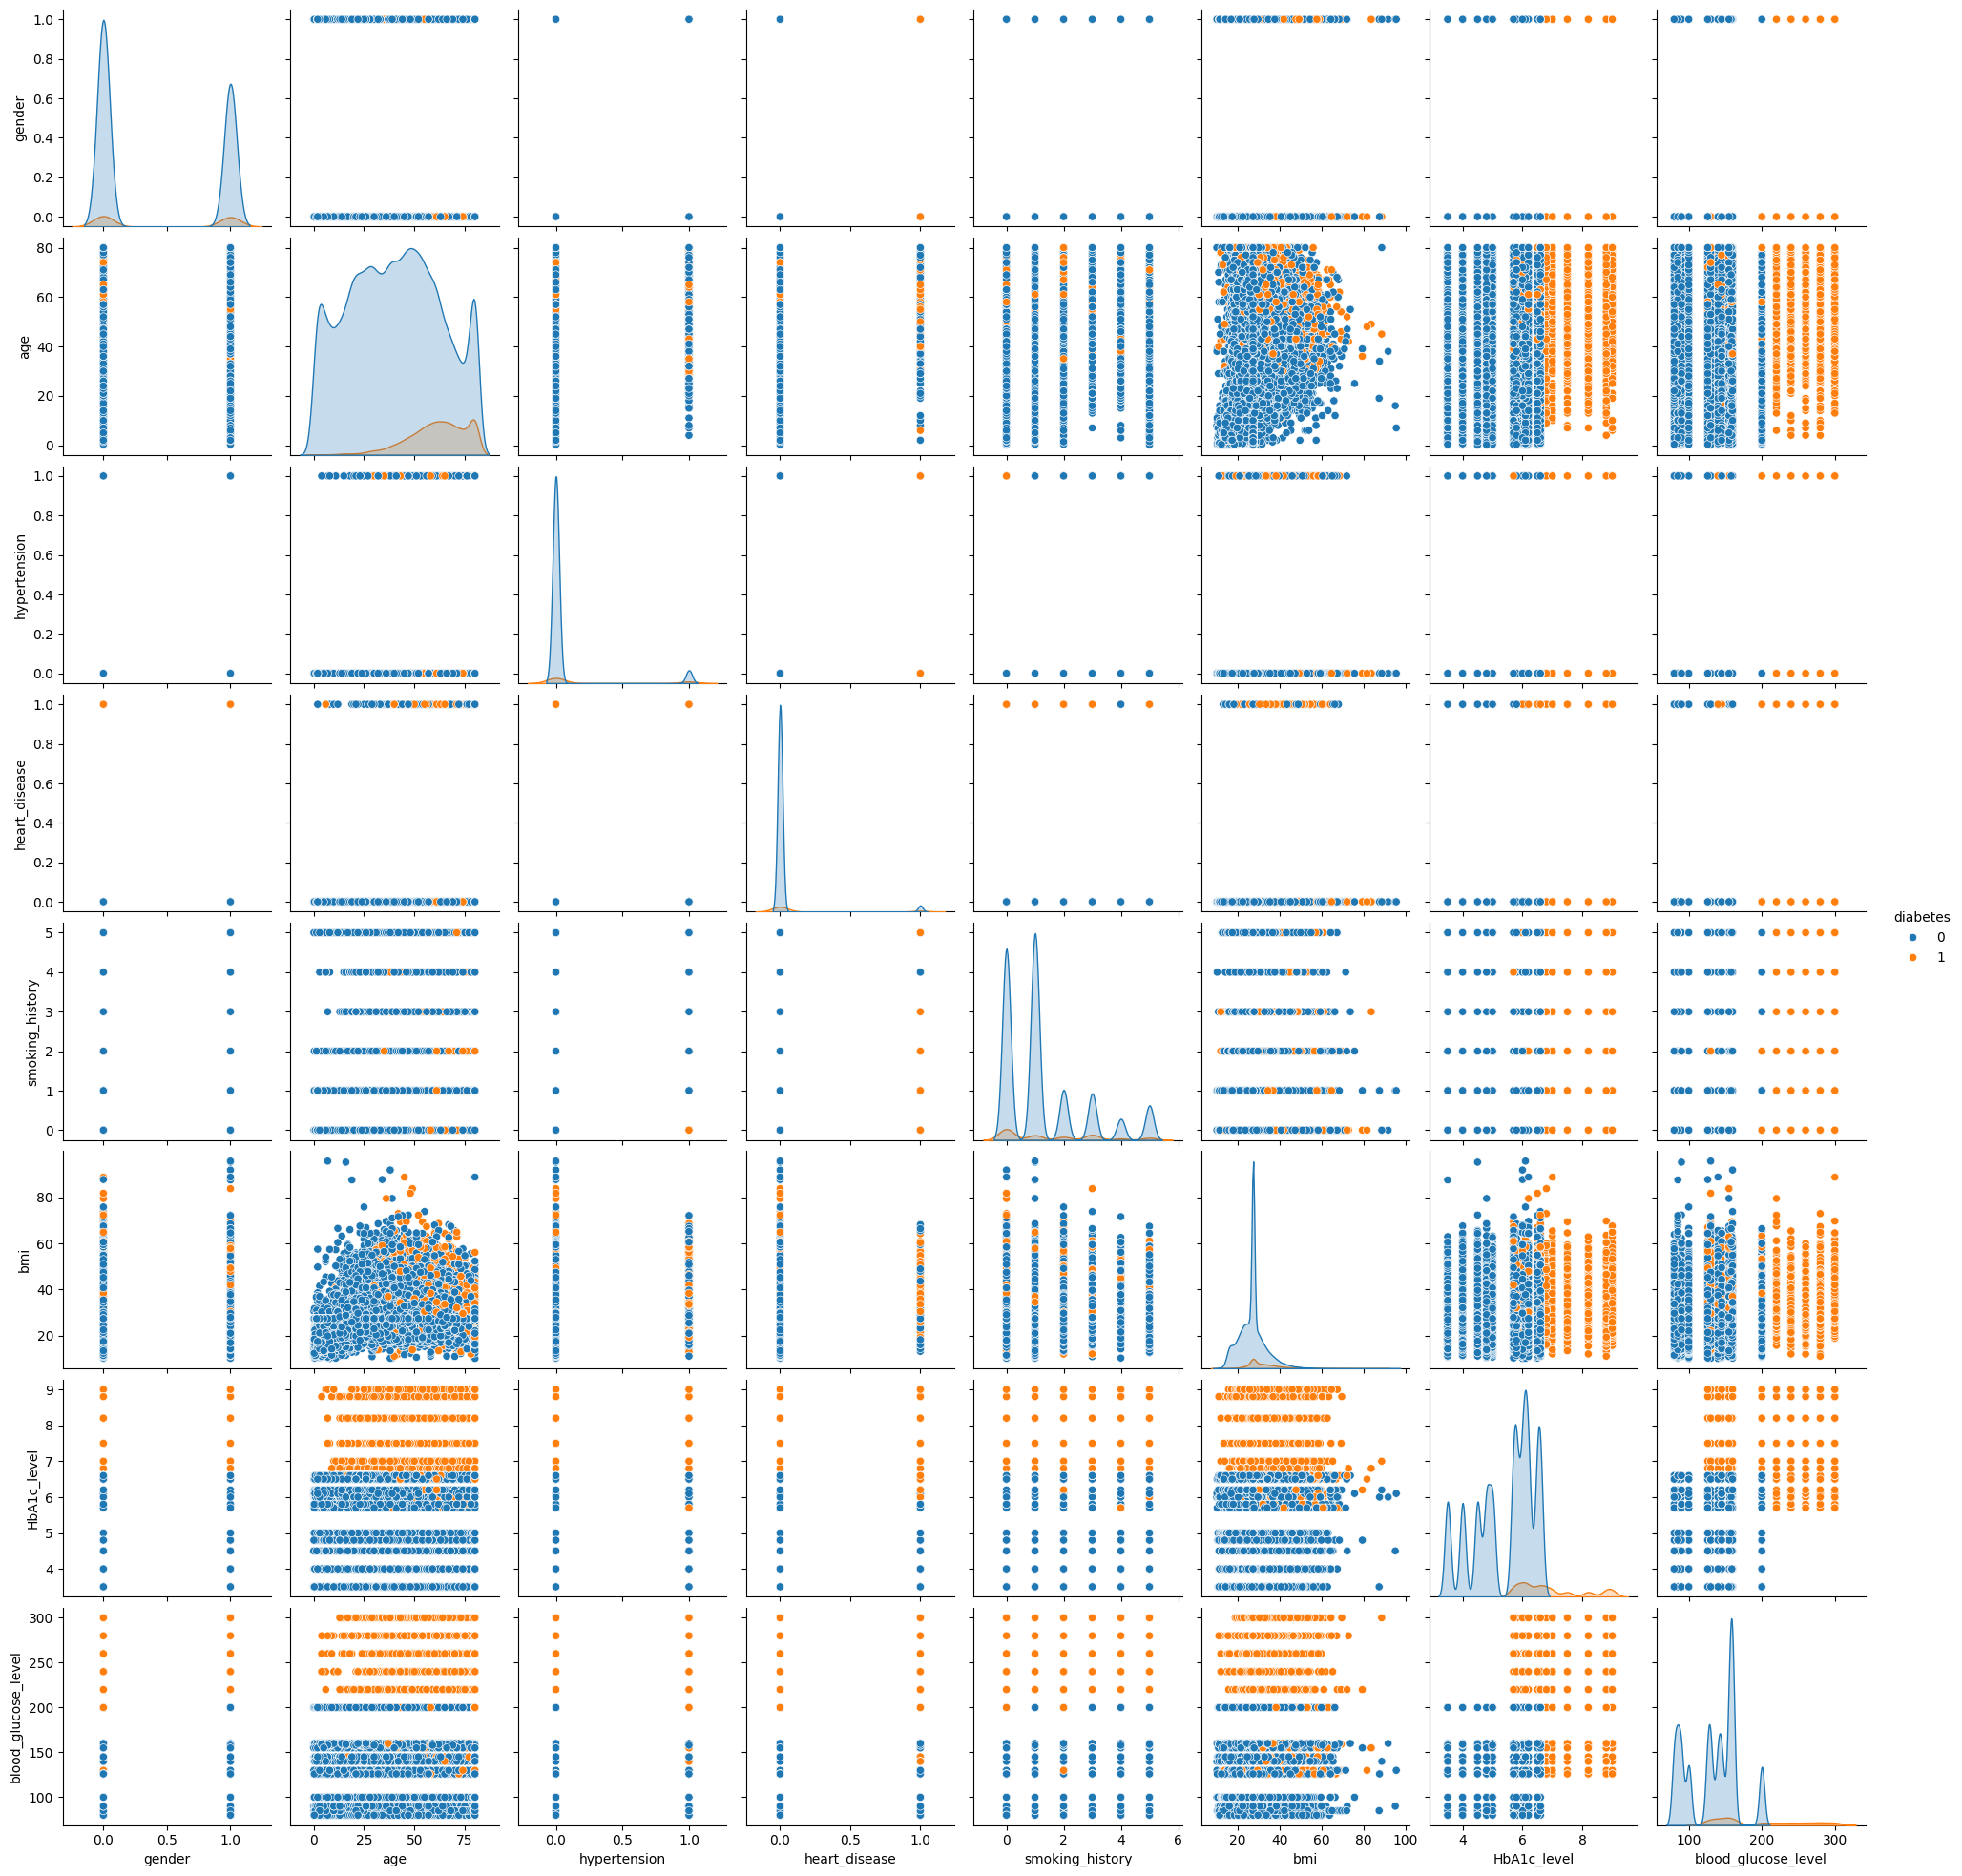

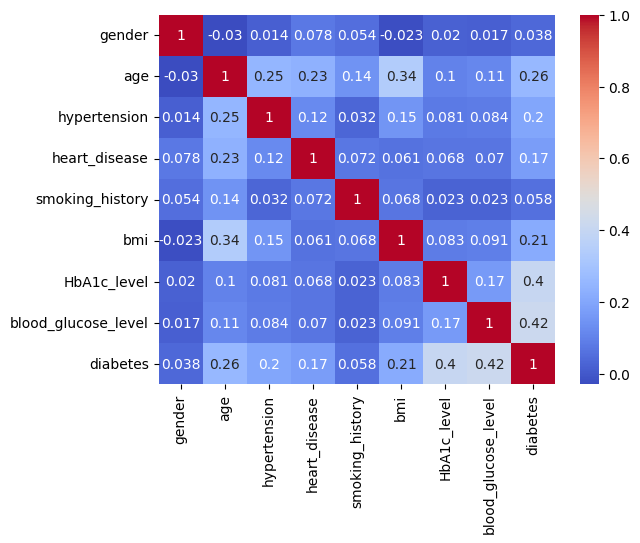

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pair plot
sns.pairplot(preprocessed_data, hue='diabetes')
plt.show()

# Create a correlation heatmap
correlation_matrix = preprocessed_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# balanced_data = oversample(preprocessed_data)
# or
balanced_data = undersample(preprocessed_data)

print(balanced_data.head())
check_num(balanced_data)

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0     0.0  17.0             0              0                0  59.60   
1     1.0  74.0             0              1                3  25.70   
2     1.0  69.0             1              0                3  24.60   
3     1.0  61.0             0              0                4  27.32   
4     1.0  64.0             1              0                3  31.86   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.5                  130         1  
2          6.0                  155         1  
3          5.7                  159         0  
4          6.5                  240         1  
Class 0: 8500
Class 1: 8500


#Bpnn Model

Epochs [100/2000]
Training: Loss: 0.1413810253, Accuracy: 0.9453125
Testing: Loss: 0.2061787993, Accuracy: 0.9002941176470588
Testing: Sensitivity/Recall: 0.8985, Specificity: 0.9022
Epochs [200/2000]
Training: Loss: 0.1671082377, Accuracy: 0.9140625
Testing: Loss: 0.2274914235, Accuracy: 0.8994117647058824
Testing: Sensitivity/Recall: 0.9081, Specificity: 0.8899
Epochs [300/2000]
Training: Loss: 0.1271725446, Accuracy: 0.9296875
Testing: Loss: 0.2420639098, Accuracy: 0.8876470588235295
Testing: Sensitivity/Recall: 0.8683, Specificity: 0.9090
Epochs [400/2000]
Training: Loss: 0.1362171173, Accuracy: 0.9453125
Testing: Loss: 0.2406036705, Accuracy: 0.8964705882352941
Testing: Sensitivity/Recall: 0.9036, Specificity: 0.8886
Epochs [500/2000]
Training: Loss: 0.1403687596, Accuracy: 0.9375
Testing: Loss: 0.2807412148, Accuracy: 0.8902941176470588
Testing: Sensitivity/Recall: 0.8834, Specificity: 0.8979
Epochs [600/2000]
Training: Loss: 0.0812605247, Accuracy: 0.953125
Testing: Loss: 0.2871

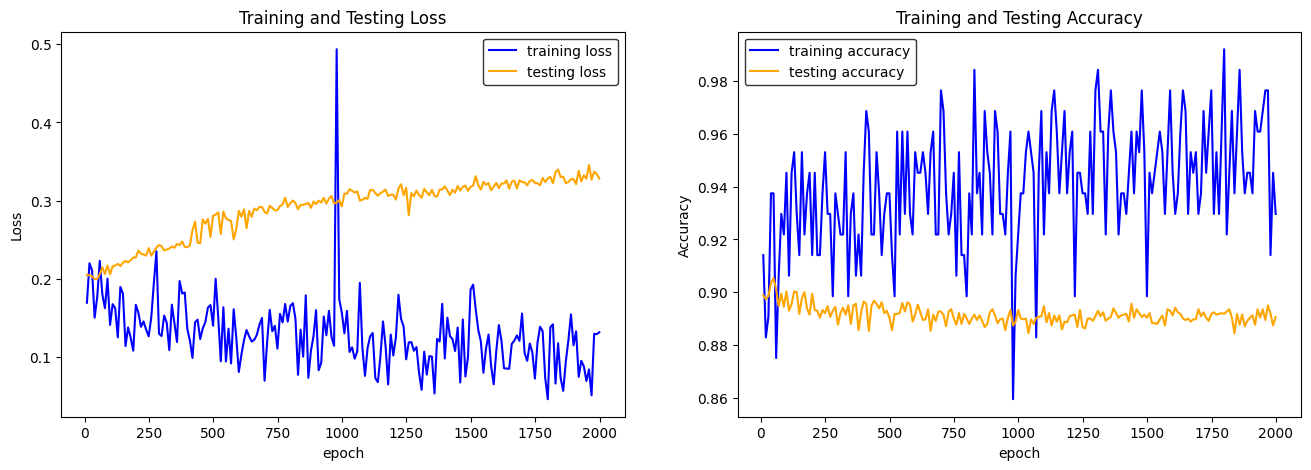

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Prepare training and testing data
train_x, test_x, train_y, test_y = data_split(balanced_data)

train_x_scaled, test_x_scaled = data_scaling(train_x, test_x)

train_x = torch.from_numpy(train_x_scaled).float()
train_y = torch.squeeze(torch.from_numpy(train_y.to_numpy()).float())

test_x = torch.from_numpy(test_x_scaled).float()
test_y = torch.squeeze(torch.from_numpy(test_y.to_numpy()).float())

# Building BPNN
class bpnn(nn.Module):
    def __init__(self, input, hid1, hid2, hid3, numclass):
        super(bpnn, self).__init__()
        self.fc1 = nn.Linear(input, hid1)
        self.batch_norm1 = nn.BatchNorm1d(num_features=hid1)
        self.fc2 = nn.Linear(hid1, hid2)
        self.batch_norm2 = nn.BatchNorm1d(num_features=hid2)
        self.fc3 = nn.Linear(hid2, hid3)
        self.batch_norm3 = nn.BatchNorm1d(num_features=hid3)
        self.fc4 = nn.Linear(hid3, numclass)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.batch_norm1(x)
        x = F.relu(self.fc2(x))
        x = self.batch_norm2(x)
        x = F.relu(self.fc3(x))
        x = self.batch_norm3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

input = train_x.shape[1]
hid1 = 64
hid2 = 32
hid3 = 16
numclass = 1
epochs = 2000
batch = 128
lrate = 0.001

model = bpnn(input, hid1, hid2, hid3, numclass)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lrate)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
epoch_list = []

for epoch in range(epochs):
    shuffle_indices = np.random.permutation(np.arange(train_y.shape[0]))
    source = train_x[shuffle_indices]
    target = train_y[shuffle_indices]

    for batch_i in range(0, len(source)//batch):
        start_i = batch_i * batch
        source_batch = source[start_i:start_i + batch]
        target_batch = target[start_i:start_i + batch]
        train_pred = model(source_batch)
        train_pred = torch.squeeze(train_pred)
        loss = criterion(train_pred, target_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_pred_np = (train_pred.detach().numpy() > 0.5).astype(int)
    train_acc = accuracy_score(target_batch, train_pred_np)

    test_pred = model(test_x)
    test_pred = torch.squeeze(test_pred)

    test_loss = criterion(test_pred, test_y)

    test_pred_np = (test_pred.detach().numpy() > 0.5).astype(int)
    test_acc = accuracy_score(test_y, test_pred_np)

    tn, fp, fn, tp = confusion_matrix(test_y, test_pred_np).ravel()

    if (epoch+1) % 10 == 0:
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_loss_list.append(loss.item())
        test_loss_list.append(test_loss.item())
        epoch_list.append(epoch)

    if test_acc >= 0.95:
        print("=================================================")
        print(f'Training: Loss: {loss.item():.10f}, Accuracy: {train_acc}')
        print(f'Testing: Loss: {test_loss.item():.10f}, Accuracy: {test_acc}')
        print(f"Testing: Sensitivity/Recall: {tp/(tp+fn):.4f}, Specificity: {tn/(tn+fp):.4f}")
        break

    if (epoch+1) % 100 == 0:
        print(f'Epochs [{epoch+1}/{epochs}]')
        print(f'Training: Loss: {loss.item():.10f}, Accuracy: {train_acc}')
        print(f'Testing: Loss: {test_loss.item():.10f}, Accuracy: {test_acc}')
        print(f"Testing: Sensitivity/Recall: {tp/(tp+fn):.4f}, Specificity: {tn/(tn+fp):.4f}")

# Plot results
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.plot(epoch_list, train_loss_list, label="training loss", c="blue")
plt.plot(epoch_list, test_loss_list, label="testing loss", c="orange")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(loc='best', frameon=True, facecolor='white', edgecolor='black')
plt.title('Training and Testing Loss', size=12)

plt.subplot(122)
plt.plot(epoch_list, train_acc_list, label="training accuracy", c="blue")
plt.plot(epoch_list, test_acc_list, label="testing accuracy", c="orange")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best', frameon=True, facecolor='white', edgecolor='black')
plt.title('Training and Testing Accuracy', size=12)

plt.show()


  0%|          | 0/1 [00:00<?, ?it/s]

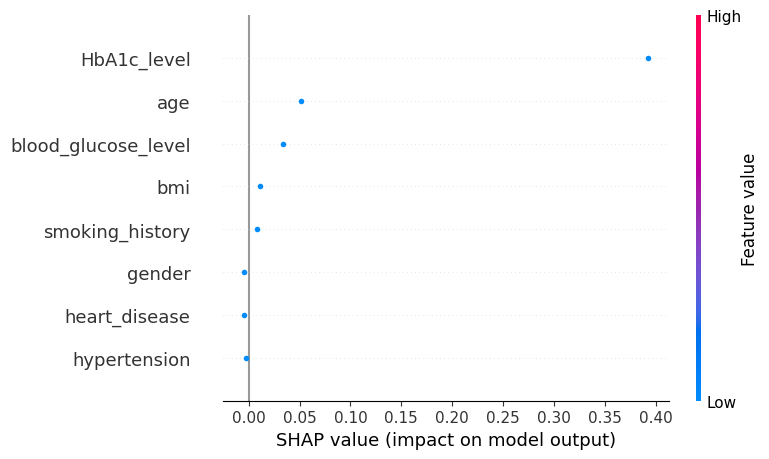

In [20]:
import shap
import numpy as np
import torch
shap.initjs()

# Create a wrapper function for your PyTorch model
def model_wrapper(x):
    # Convert numpy array to torch tensor
    x_tensor = torch.tensor(x, dtype=torch.float32)
    # Set the model to evaluation mode
    model.eval()  # Add this line to disable Batch Normalization during inference
    # Get predictions from the model
    with torch.no_grad():
        output = model(x_tensor)
    # Return as numpy array
    return output.numpy()

# Create a background dataset for SHAP (using a subset of training data)
background_data = train_x_scaled[:100]  # Using first 100 samples as background

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model_wrapper, background_data)

# Choose a test instance to explain
instance_to_explain = test_x_scaled[0:1]  # Explaining first test instance

# Calculate SHAP values
shap_values = explainer.shap_values(instance_to_explain)

# Reshape shap_values to 2D if necessary
shap_values = shap_values.reshape(shap_values.shape[0], -1) # Reshape to (number of instances, number of features)

# Create summary plot
shap.summary_plot(shap_values, instance_to_explain, feature_names=balanced_data.columns[:-1])

# For a specific prediction explanation
shap.force_plot(explainer.expected_value, shap_values[0], instance_to_explain[0],
                feature_names=balanced_data.columns[:1])
